In [10]:
# 1. Các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('../../Datasets/INTC Historical Data.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3524.660, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3583.601, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3532.226, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3540.464, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3581.828, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3524.535, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3523.932, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3523.595, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3515.394, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3517.356, Time=0.65 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3517.364, Time=0.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3524.266, Time=0.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3513.658, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0]             : 

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [14]:
# Quá trình Training
train_data = df[:train_size+test_size]
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4437.511, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4492.147, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4441.923, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4449.008, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4490.208, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4436.867, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4435.328, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4436.542, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4441.367, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4428.241, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4415.990, Time=1.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4441.476, Time=0.55 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4429.431, Time=1.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4429.526, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [16]:
# Quá trình Training
train_data = df
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4849.982, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4902.683, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4853.947, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4860.626, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4900.684, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4849.236, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4847.435, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4849.099, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4852.863, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4841.370, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4826.162, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4853.976, Time=0.55 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4841.836, Time=1.20 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4842.115, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[35.72835717 35.81616376 35.7299222  35.80431132 35.7507833  35.77793601
 35.77861784 35.75256161 35.79828058 35.74080659 35.80119706 35.74637481
 35.78862514 35.76364016 35.76942032 35.78200018 35.75433739 35.79202752
 35.75030333 35.79002775 35.75755107 35.77896685 35.77059227 35.76589246
 35.78191381 35.75771885 35.78609239 35.75776549 35.78218619 35.76467025]


In [18]:
# 7. Đánh giá độ chính xác validate, test
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mape(y_test, y_pred)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)
valid_mape = mape(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
# print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)
# print("Testing MAPE:", test_mape)

print('Validation RMSE:', valid_rmse)
# print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)
# print("Validation MAPE:", valid_mape)

Testing RMSE: 12.994437538608938
Testing MAE: 9.864704017788151
Validation RMSE: 3.7504595824991593
Validation MAE: 3.207718426568522


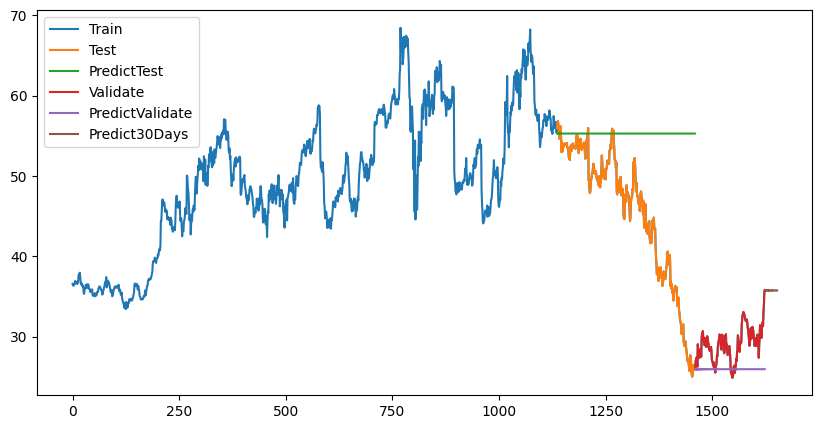

In [19]:
# 9.Vẽ hình
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest','Validate','PredictValidate','Predict30Days'])
plt.show()

In [20]:
test_data.index

RangeIndex(start=1136, stop=1460, step=1)